<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°071


<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1cI62fPIKkkofrAHLQaWLfcIr3qlE1TAZ" width = "350" align="center"/>



Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad.
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo (Por lo menos debe comparar cuatro modelos)
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: El alumno tiene la libertad de desarrollar un análisis más completo del problema. Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [3]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#Información del dataset


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**Comentario:** No hay datos nulos y son todos numéricos. Esto facilita el análisis.

# Estadísticas de los datos


In [5]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Visualización descriptiva

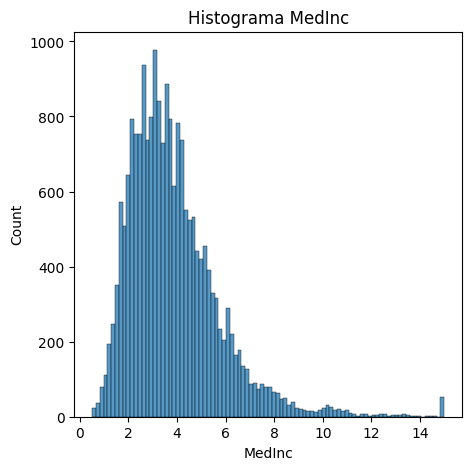

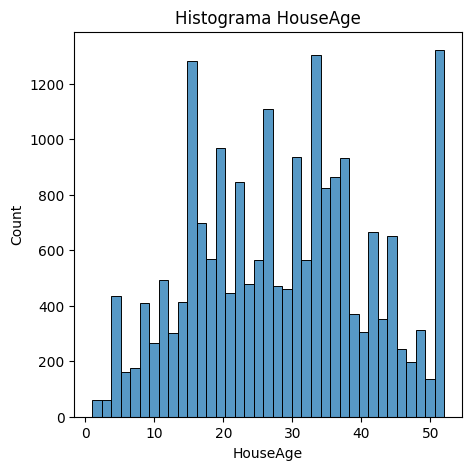

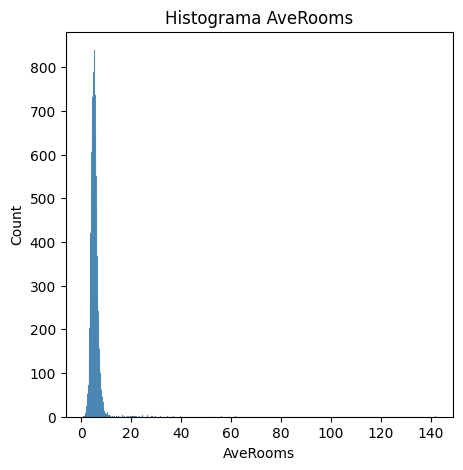

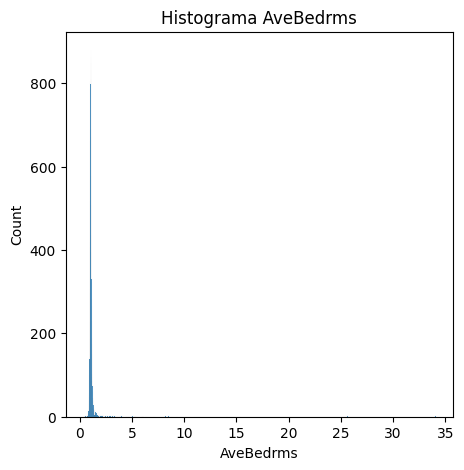

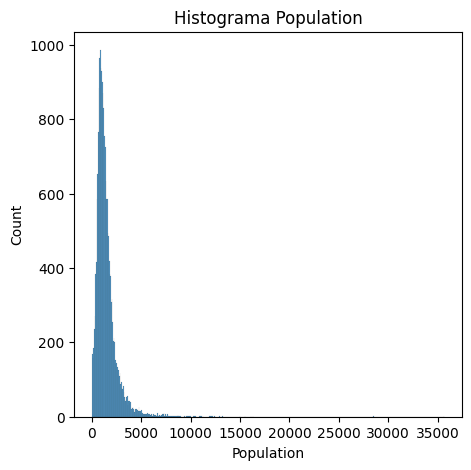

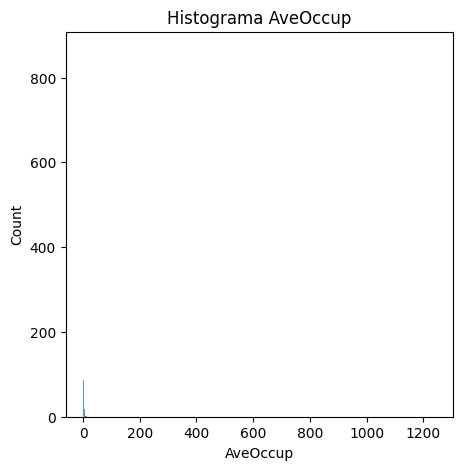

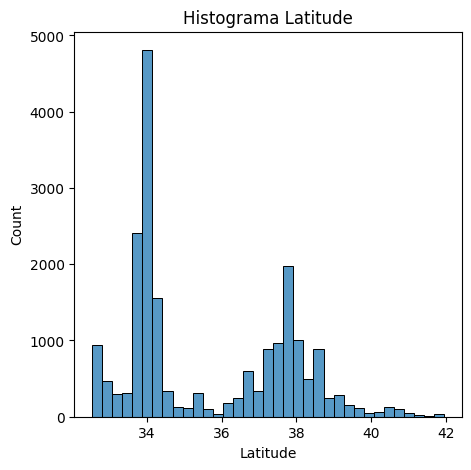

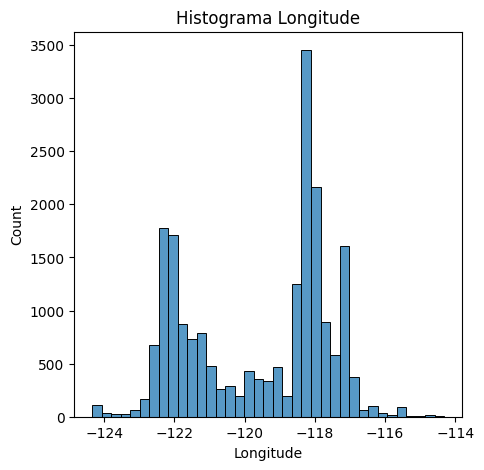

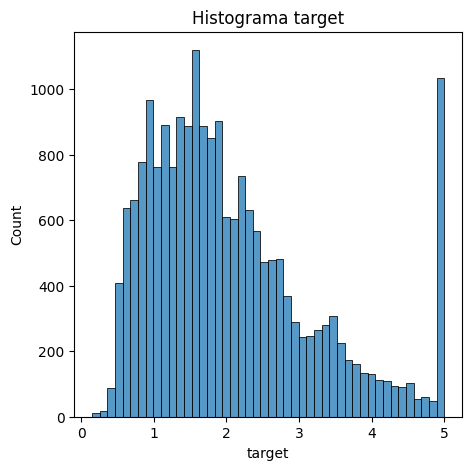

In [6]:
for col in housing.columns:
  plt.figure(figsize=(5, 5))
  sns.histplot(x = col, data = housing)
  plt.title(f'Histograma {col}')
  plt.show()

**Comentario:** Existen atributos con outliers importantes, como AveRooms, AveBedrms, Population y AveOccup. Estos datos se mantienen en la muestra, ya que las diferencias deben influir de manera importante en el precio promedio de la propiedad (target). También se observan distintas escalas entre los atributos, por lo que es importante el reescalamiento.

# Preprocesamiento


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Estandarización:
scaler = StandardScaler()
housing_standard = scaler.fit_transform(housing)
housing_standard = pd.DataFrame(housing_standard, columns = housing.columns)

# Matriz de atributos y vector target:
X = housing_standard.drop('target', axis = 1).values
Y = housing['target'].values

# Datos de entrenamiento y datos de prueba:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

print('Separando informacion:\n')
print('numero de filas data original : ', len(X))
print('numero de filas train set     : ', len(X_train))
print('numero de filas test set      : ', len(X_test))

Separando informacion:

numero de filas data original :  20640
numero de filas train set     :  16512
numero de filas test set      :  4128


# Selección de modelos


In [8]:
# Cuatro modelos:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Métricas y Análisis de resultados


In [9]:
# Entrenamiento, predicción y toma de mediciones:

# 1) Linear Regression:
start = time.time()
linear_model =  LinearRegression()
linear_model.fit(X_train, Y_train)
linear_predict = linear_model.predict(X_test)
linear_time = time.time() - start

linear_metrics = regression_metrics(pd.DataFrame({'y': Y_test, 'yhat': linear_predict}))
linear_metrics['tiempo_seg'] = [linear_time]

display(linear_metrics)

,mae,mse,rmse,mape,smape,tiempo_seg
0,0.5332,0.5559,0.7456,31.9522,0.4843,0.014594


In [10]:
# 2) SVR:
start = time.time()
svr_model =  SVR()
svr_model.fit(X_train, Y_train)
svr_predict = svr_model.predict(X_test)
svr_time = time.time() - start

svr_metrics = regression_metrics(pd.DataFrame({'y': Y_test, 'yhat': svr_predict}))
svr_metrics['tiempo_seg'] = [svr_time]

display(svr_metrics)

,mae,mse,rmse,mape,smape,tiempo_seg
0,0.3978,0.3552,0.596,21.662,0.3561,17.081743


In [11]:
# 3) Random Forest Regressor:
start = time.time()
rfr_model =  RandomForestRegressor()
rfr_model.fit(X_train, Y_train)
rfr_predict = rfr_model.predict(X_test)
rfr_time = time.time() - start

rfr_metrics = regression_metrics(pd.DataFrame({'y': Y_test, 'yhat': rfr_predict}))
rfr_metrics['tiempo_seg'] = [rfr_time]

display(rfr_metrics)

,mae,mse,rmse,mape,smape,tiempo_seg
0,0.3294,0.2569,0.5068,19.0101,0.3195,13.900184


In [12]:
# 4) Decision Tree Regressor:
start = time.time()
dtr_model =  DecisionTreeRegressor()
dtr_model.fit(X_train, Y_train)
dtr_predict = dtr_model.predict(X_test)
dtr_time = time.time() - start

dtr_metrics = regression_metrics(pd.DataFrame({'y': Y_test, 'yhat': dtr_predict}))
dtr_metrics['tiempo_seg'] = [dtr_time]

display(dtr_metrics)

,mae,mse,rmse,mape,smape,tiempo_seg
0,0.4525,0.4935,0.7025,24.8409,0.398,0.199982


In [13]:
# Resultados:

models = {'modelo': ['Linear Regression', 'SVR', 'Random Forest Regressor', 'Decision Tree Regressor']}
models_df = pd.DataFrame(models)
metrics = pd.concat([linear_metrics, svr_metrics, rfr_metrics, dtr_metrics], axis = 0).reset_index().drop(['index'], axis = 1)

resultados = pd.concat([models_df, metrics], axis = 1)

display(resultados)

,modelo,mae,mse,rmse,mape,smape,tiempo_seg
0,Linear Regression,0.5332,0.5559,0.7456,31.9522,0.4843,0.014594
1,SVR,0.3978,0.3552,0.5960,21.6620,0.3561,17.081743
2,Random Forest Regressor,0.3294,0.2569,0.5068,19.0101,0.3195,13.900184
3,Decision Tree Regressor,0.4525,0.4935,0.7025,24.8409,0.3980,0.199982


# Conclusiones


En general, observamos que **los modelos se entrenan en poco tiempo**, en detalle: Lineal Regression y Decision Tree Regressor tardan menos de 1 segundo y SVR junto a Random Forest Regressor, entre los 10-20 segundos.

Se obtuvo valores más altos de los distintos errores para el modelo **Linear Regressor**, por ende, este modelo es el que obtuvo peores resultados, con un **MAPE = 31,95%**.

Como el siguiente peor modelo, se encuentra el modelo **Decision Tree Regressor** que posee los 2dos errores más elevados, con un **MAPE = 24,84%**. Continua **SVR**, con un **MAPE = 21,66%**.

Finalmente, se tiene como mejor modelo **Random Forest Regressor**, con los errores más bajos y un **MAPE = 19,01%**.

En resúmen, los modelos ordenados del mejor al peor:
- 1° **Random Forest Regressor**, MAPE = 19,01%, Tiempo de entrenamiento: 13,9 seg.

- 2° **SVR**, MAPE = 21,66%, Tiempo de entrenamiento: 17,1 seg.

- 3° **Decision Tree Regressor**, MAPE = 24,84%, Tiempo de entrenamiento: 0.2 seg.

- 4° **Linear Regressor**, MAPE = 31,95%, Tiempo de entrenamiento: 0.01 seg.

Se tiene que el modelo **Linear Regressor** obtuvo errores más distantes respecto a los demás modelos, los cuales estos últimos estaban bien parejos.

También, se observa que los modelos que menos tardaron en entrenarse son aquellos con peores resultados. Sin embargo, el resultado que más tiempo de entrenamiento tardó no es aquel con mejores errores.

Dado que todos los modelos poseen pequeños tiempos de entrenamiento, se prefiere en este caso modelos con errores más pequeños. Sin embargo, dada las diferencias de errores, si un mejor modelo tarda un tiempo considerable en entrenarse, no siempre se preferirá este. Todo depende de las necesidades e intereses que se tengan del problema.
